# Implementing Particle Swarm Optimization For Mock Assessment Solution

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import networkx as nx
from networkx.classes import neighbors

In [114]:
colnames = ['Node', 'Position1', 'Position2']
position_data = pd.read_csv('sub_data_file.csv', header=None, names=colnames, index_col=['Node']) # Reading and assigning the nodes as index, to remove redundancy
position_data.head()

,Position1,Position2
Node,,
1,4873.6,4886.7
2,-3295.7,-4330.5
3,-2407.1,4397.4
4,-1027.0,-4828.9
5,-4260.1,1838.4


## Plotting The points

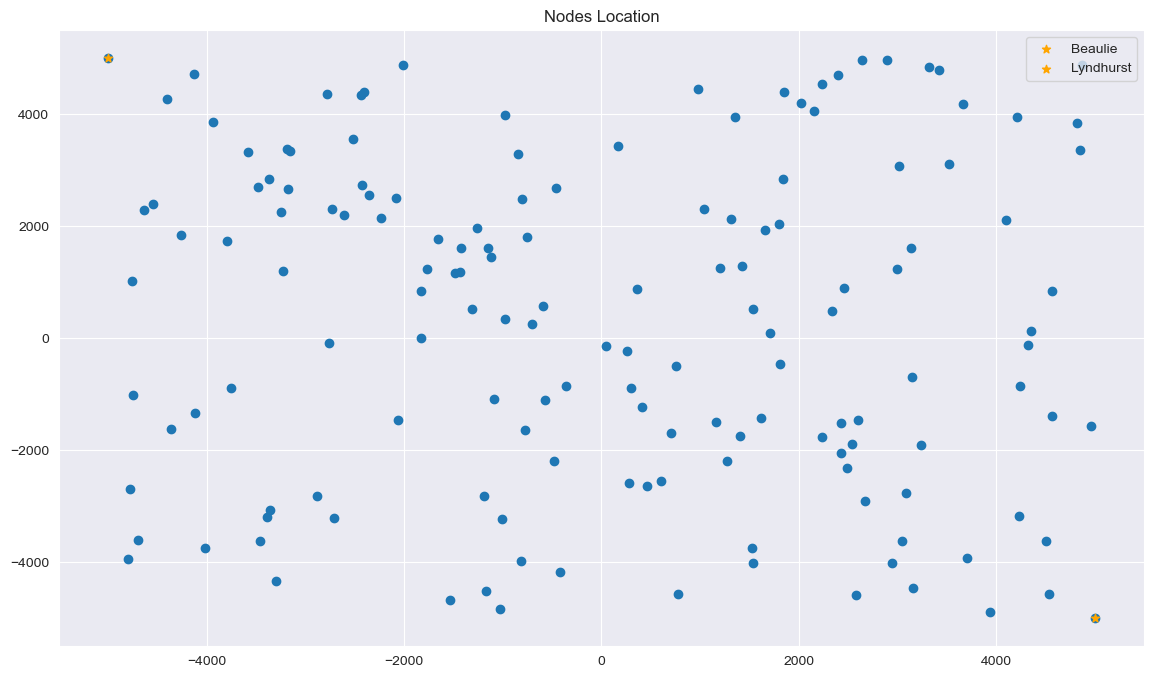

In [115]:
coordinate_x = position_data['Position1']
coordinate_y = position_data['Position2']

# Input Beaulieu and Lyndhurst coordinates
beaulie_coordinate = (5000, -5000)
lyndhurst_coordinate = (-5000, 5000)

plt.figure(figsize = (14, 8))
plt.title('Nodes Location')
plt.scatter(coordinate_x, coordinate_y)
plt.scatter(beaulie_coordinate[0], beaulie_coordinate[1], label='Beaulie', color='orange', marker='*')
plt.scatter(lyndhurst_coordinate[0], lyndhurst_coordinate[1], label='Lyndhurst', color='orange', marker='*')
plt.legend(loc='upper right')
plt.show()

> We are Going to create a function to get the particle to reach a destination vertex either 151, or 152.

In [116]:
def calculate_distance(x1, x2, y1, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
distances = [] # List for appending in dataframe
for i in range(len(position_data)):
    for j in range(i + 1, len(position_data)):
        id1 = position_data.index[i]
        id2 = position_data.index[j]
        x1, y1 = position_data.iloc[i]['Position1'], position_data.iloc[i]['Position2']
        x2, y2 = position_data.iloc[j]['Position1'], position_data.iloc[j]['Position2']
        distance = calculate_distance(x1, x2, y1, y2)
        distances.append({"point1": id1, "point2": id2, "distance": distance})

distance_df = pd.DataFrame(distances)
print(f'There are total of {len(distance_df)} points.')
distance_df.loc[(distance_df['point1'] == 1)& (distance_df['point2'] == 141)]

There are total of 11476 points.


,point1,point2,distance
139,1,141,7623.831483


In [117]:
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, float('inf')]
labels = [7,5,4,3,2,1,0]
distance_df['transmission'] = pd.cut(distance_df['distance'], bins=bins, labels=labels, right=False)
distance_df.drop(distance_df.index[distance_df['transmission'] == 0], inplace=True)
distance_df.head()

,point1,point2,distance,transmission
6,1,8,1034.795366,4
18,1,20,1552.523752,3
38,1,40,2232.795239,2
40,1,42,2475.977770,2
53,1,55,2932.511040,1


In [118]:
# Adding the graph data type for simplicity.
G = nx.Graph()
for _, row in distance_df.iterrows():
    G.add_edge(row['point1'], row['point2'], weight=row['transmission'])


In [119]:
print(f"Graph edges with weights: {list(G.edges(data=True))}")

Graph edges with weights: [(1.0, 8.0, {'weight': 4.0}), (1.0, 20.0, {'weight': 3.0}), (1.0, 40.0, {'weight': 2.0}), (1.0, 42.0, {'weight': 2.0}), (1.0, 55.0, {'weight': 1.0}), (1.0, 76.0, {'weight': 4.0}), (1.0, 86.0, {'weight': 1.0}), (1.0, 93.0, {'weight': 3.0}), (1.0, 94.0, {'weight': 2.0}), (1.0, 100.0, {'weight': 4.0}), (1.0, 114.0, {'weight': 4.0}), (1.0, 127.0, {'weight': 1.0}), (1.0, 133.0, {'weight': 1.0}), (1.0, 146.0, {'weight': 3.0}), (1.0, 150.0, {'weight': 1.0}), (8.0, 20.0, {'weight': 3.0}), (8.0, 40.0, {'weight': 2.0}), (8.0, 42.0, {'weight': 1.0}), (8.0, 55.0, {'weight': 1.0}), (8.0, 76.0, {'weight': 5.0}), (8.0, 86.0, {'weight': 1.0}), (8.0, 93.0, {'weight': 2.0}), (8.0, 94.0, {'weight': 4.0}), (8.0, 100.0, {'weight': 4.0}), (8.0, 114.0, {'weight': 3.0}), (8.0, 127.0, {'weight': 1.0}), (8.0, 133.0, {'weight': 3.0}), (8.0, 136.0, {'weight': 1.0}), (8.0, 146.0, {'weight': 7.0}), (8.0, 150.0, {'weight': 3.0}), (20.0, 6.0, {'weight': 2.0}), (20.0, 17.0, {'weight': 3.0}), 

> Some important functions to check path validity

In [120]:
# Function to check valid paths
# Should remove the ones with zero weights just to make sure the path is valid at all points.
# Don't think we will be using this function anymore because have already removed all zeros transmissions
def is_valid_path(path, graph):
    for i in range(len(path) - 1):
        if not graph.has_edge(path[i], path[i + 1]):
            return False
    return True

In [121]:
G.nodes()

NodeView((1.0, 8.0, 20.0, 40.0, 42.0, 55.0, 76.0, 86.0, 93.0, 94.0, 100.0, 114.0, 127.0, 133.0, 146.0, 150.0, 2.0, 4.0, 11.0, 12.0, 13.0, 38.0, 47.0, 48.0, 67.0, 71.0, 75.0, 82.0, 83.0, 88.0, 128.0, 132.0, 137.0, 147.0, 3.0, 9.0, 22.0, 23.0, 24.0, 26.0, 33.0, 39.0, 44.0, 50.0, 51.0, 54.0, 56.0, 68.0, 69.0, 70.0, 80.0, 99.0, 104.0, 108.0, 110.0, 111.0, 119.0, 122.0, 123.0, 125.0, 126.0, 141.0, 142.0, 144.0, 152.0, 27.0, 66.0, 73.0, 78.0, 105.0, 140.0, 143.0, 5.0, 16.0, 31.0, 32.0, 34.0, 60.0, 63.0, 65.0, 102.0, 109.0, 117.0, 121.0, 6.0, 10.0, 17.0, 21.0, 29.0, 35.0, 52.0, 59.0, 85.0, 87.0, 96.0, 101.0, 106.0, 115.0, 134.0, 135.0, 136.0, 148.0, 7.0, 18.0, 19.0, 25.0, 30.0, 45.0, 46.0, 58.0, 64.0, 79.0, 89.0, 91.0, 95.0, 98.0, 107.0, 113.0, 116.0, 130.0, 138.0, 139.0, 92.0, 129.0, 149.0, 124.0, 131.0, 14.0, 15.0, 28.0, 49.0, 53.0, 57.0, 61.0, 62.0, 72.0, 77.0, 81.0, 84.0, 90.0, 97.0, 112.0, 145.0, 151.0, 41.0, 43.0, 103.0, 118.0, 37.0, 74.0, 120.0, 36.0))

In [229]:
import random
NUM_PARTICLES=1
def initialize_population_from_df(start_node, distance_df, max_length=6):
    """
    Generate population using valid connections from distance_df.
    """
    population = []
    retries = 0
    valid_edges = list(zip(distance_df['point1'], distance_df['point2']))
    graph = nx.Graph(valid_edges)  # Create a graph from the valid connections

    while len(population) < NUM_PARTICLES and retries < 10000:
        retries += 1
        path = [start_node]
        current_node = start_node

        # Randomly select nodes to form a path
        for _ in range(random.randint(1, max_length - 2)):  # Middle part length
            neighbors = list(graph.neighbors(current_node))
            if not neighbors:
                break  # No valid neighbors, stop path construction
            next_node = random.choice(neighbors)
            if next_node not in path:  # Avoid cycles
                path.append(next_node)
                current_node = next_node

        # Append valid end node
        end_node = random.choice([151, 152])
        if graph.has_edge(current_node, end_node):
            path.append(end_node)
            population.append(path)
            retries = 0  # Reset retries on success

    # Fallback: Print warning if retries exceeded
    if len(population) < NUM_PARTICLES:
        print(f"Warning: Could only generate {len(population)} valid paths after 100 retries.")
    return population
population = initialize_population_from_df(1, distance_df, max_length=20)
print(population[0])
print(len(population))

[1, 94, 52, 122, 9, 68, 22, 39, 125, 50, 80, 119, 51, 123, 23, 152]
1


In [642]:
def initialize_population(start_node,graph,valid_end_nodes=[151,152], max_length=50):
    current_node = start_node
    elems = [current_node]
    while elems[-1] not in valid_end_nodes:
        neighbors = [neighbor for neighbor in graph.neighbors(current_node) if neighbor not in elems]
        if not neighbors:
            break
        next_node = random.choice(neighbors)
        elems.append(next_node)
        current_node = next_node
    return elems

In [643]:
populations = [initialize_population(1,G,valid_end_nodes=[151,152]) for _ in range(20)]

In [644]:
initialize_population(1, G)

[1,
 100.0,
 17.0,
 6.0,
 115.0,
 62.0,
 103.0,
 92.0,
 10.0,
 94.0,
 59.0,
 95.0,
 102.0,
 34.0,
 144.0,
 111.0,
 99.0,
 44.0,
 60.0,
 56.0,
 63.0,
 126.0,
 50.0,
 16.0,
 98.0,
 66.0,
 140.0,
 137.0,
 82.0,
 71.0,
 13.0,
 2.0,
 47.0,
 4.0,
 67.0,
 124.0,
 120.0,
 118.0,
 41.0,
 97.0,
 14.0,
 57.0,
 49.0,
 43.0,
 58.0,
 84.0,
 138.0,
 87.0,
 101.0,
 85.0,
 28.0,
 77.0,
 112.0,
 81.0,
 105.0,
 129.0,
 64.0,
 116.0,
 131.0,
 143.0,
 45.0,
 74.0,
 61.0,
 15.0,
 53.0,
 145.0,
 72.0,
 151.0]

In [645]:
def initialize_velocities(population, graph):
    velocities = []
    for individual in population:
       direction = individual[-1]
       weights = [
            graph[individual[i]][individual[i + 1]].get('weight', float('inf'))
            for i in range(len(individual) - 1)
        ]
       average_weight = np.mean(weights) if weights else float('inf')
       update_index = random.randint(1, len(individual) - 1)
       velocity = (direction, average_weight, update_index)
       velocities.append(velocity)
    return velocities

In [646]:
velocities = initialize_velocities(populations, G)
print(populations[0])
print(velocities[0])

[1, 8.0, 94.0, 150.0, 52.0, 45.0, 46.0, 16.0, 65.0, 111.0, 50.0, 69.0, 39.0, 29.0, 79.0, 139.0, 85.0, 36.0, 37.0, 35.0, 58.0, 27.0, 78.0, 14.0, 61.0, 77.0, 43.0, 97.0, 84.0, 66.0, 89.0, 95.0, 148.0, 136.0, 135.0, 59.0, 106.0, 102.0, 5.0, 80.0, 9.0, 96.0, 55.0, 42.0, 86.0, 134.0, 10.0, 68.0, 70.0, 108.0, 26.0, 24.0, 21.0, 20.0, 6.0, 110.0, 104.0, 125.0, 126.0, 33.0, 119.0, 121.0, 117.0, 113.0, 22.0, 51.0, 123.0, 142.0, 23.0, 141.0, 30.0, 7.0, 19.0, 81.0, 28.0, 64.0, 18.0, 132.0, 47.0, 12.0, 143.0, 124.0, 73.0, 112.0, 15.0, 62.0, 115.0, 87.0, 107.0, 144.0, 91.0, 31.0, 34.0, 130.0, 63.0, 99.0, 56.0, 32.0, 149.0, 83.0, 109.0, 11.0, 67.0, 4.0, 140.0, 145.0, 49.0, 72.0, 151.0]
(151.0, 2.824074074074074, 45)


In [656]:
def update_velocity(position, velocity, personal_best_position, global_best_position):
    direction, weight_criteria, update_index = velocity

    std_personal_best = np.std(personal_best_position)
    mean_personal_best = np.mean(personal_best_position)
    mean_global_best = np.mean(global_best_position)

    cognitive_influence = np.random.random() * (mean_personal_best - np.mean(position))
    social_influence = np.random.random() * (mean_global_best - np.mean(position))

    new_weight = weight_criteria + cognitive_influence + social_influence
    if global_best_position[-1] != direction:
        direction = global_best_position[-1]
    new_update_index = update_index
    if np.random.random() < 0.5:  # Random chance to explore
        new_update_index = min(update_index + 1, len(position) - 1)
    else:  # Move toward the global best
        diff = len(global_best_position) - len(position)
        new_update_index = max(1, min(update_index + diff, len(position) - 1))

    new_velocity = (direction, new_weight, new_update_index)
    return new_velocity

In [687]:
def update_position(position, velocity, graph):
    """
    Updates the position based on velocity and graph structure.

    Parameters:
        position (list): Current position (path) of the particle.
        velocity (tuple): (direction, min_weight, update_index).
        graph (networkx.Graph): The graph with weighted edges.

    Returns:
        list: Updated position (path).
    """
    direction, min_weight, update_index = velocity
    start_node = position[:update_index]
    current_node = start_node[-1]
    elems = start_node.copy()

    while elems[-1] != direction:
        # Get unvisited neighbors
        neighbors = [neighbor for neighbor in graph.neighbors(current_node) if neighbor not in elems]
        if not neighbors:
            print("No valid neighbors. Breaking loop.")
            break

        # Get neighbors with weights above the minimum threshold
        weighted_neighbors = [
            (neighbor, graph[current_node][neighbor].get('weight', float('inf'))) for neighbor in neighbors
        ]
        valid_neighbors = [neighbor for neighbor, weight in weighted_neighbors if weight >= min_weight]

        if not valid_neighbors:
            reduced_min_weight = min_weight * random.random()
            valid_neighbors = [neighbor for neighbor, weight in weighted_neighbors if weight >= reduced_min_weight]

            if not valid_neighbors:
                #print("Reduced Threshold but no valid neighbors. Breaking loop. Returning Initial Position No Update Found")
                return position

        # Check for target nodes (151 or 152) in valid neighbors
        target_nodes = [node for node in valid_neighbors if node in [151, 152]]
        if target_nodes:
            next_node = random.choice(target_nodes)  # Choose randomly between 151 or 152 if both exist
            elems.append(next_node)
            return elems

        # Select a random valid neighbor
        next_node = random.choice(valid_neighbors)
        elems.append(next_node)
        current_node = next_node

    return elems

In [688]:
update_position([1, 86.0, 150.0, 17.0, 21.0, 59.0, 10.0, 98.0, 64.0, 112.0, 27.0, 137.0, 128.0, 88.0, 4.0, 105.0, 129.0, 116.0, 115.0, 95.0, 26.0, 125.0, 111.0, 104.0, 142.0, 63.0, 60.0, 152.0], (152.0, 3.037037037037037, 13), G)

[1,
 86.0,
 150.0,
 17.0,
 21.0,
 59.0,
 10.0,
 98.0,
 64.0,
 112.0,
 27.0,
 137.0,
 128.0,
 88.0,
 12.0,
 140.0,
 66.0,
 58.0,
 19.0,
 46.0,
 30.0,
 65.0,
 33.0,
 107.0,
 7.0,
 89.0,
 25.0,
 18.0,
 91.0,
 16.0,
 113.0,
 26.0,
 102.0,
 110.0,
 29.0,
 24.0,
 22.0,
 122.0,
 141.0,
 144.0,
 63.0,
 51.0,
 119.0,
 125.0,
 104.0,
 123.0,
 152.0]

In [689]:
def fitness_function(path, graph, w_latency=1.0, w_rate=1.0):
    """
    Fitness function: Fixed latency (30) and bottleneck transmission rate.
    """
    total_latency = 30 * (len(path) - 1)  # Fixed latency between consecutive nodes
    min_transmission_rate = float('inf')

    for i in range(len(path) - 1):
        u, v = path[i], path[i + 1]
        if graph.has_edge(u, v):
            edge_data = graph[u][v]
            min_transmission_rate = min(min_transmission_rate, edge_data["weight"])
        else:
            return float('inf')  # Penalize invalid paths

    # Combine latency and transmission rate
    return w_latency * total_latency + w_rate / min_transmission_rate

In [690]:
fitness_function(populations[0], G)

3241.0

In [691]:
fitnesses = [fitness_function(path, G) for path in populations]

In [692]:
min(fitnesses), max(fitnesses)

(451.0, 3721.0)

In [730]:
NUM_PARTICLES = 1000

def pso(graph, start_node, df, max_length=20, iterations=500):
    """
    PSO implementation for pathfinding in a graph using valid paths.
    """
    # Step 1: Initialize Population
    population = [initialize_population(start_node, graph=graph, valid_end_nodes=[151, 152]) for _ in range(NUM_PARTICLES)]
    velocities = initialize_velocities(population, graph=graph)
    #print(f'Initial Population: {population}')

    # Calculate Initial Fitness
    fitnesses = [fitness_function(path, graph) for path in population]
    personal_best_positions = population.copy()
    personal_best_fitnesses = fitnesses.copy()

    # Identify Initial Global Best
    global_best_index = np.argmin(personal_best_fitnesses)
    global_best_position = personal_best_positions[global_best_index]
    global_best_fitness = personal_best_fitnesses[global_best_index]

    # Step 2: Main PSO Loop
    for iteration in range(iterations):
        for i in range(NUM_PARTICLES):
            # Update velocity
            velocities[i] = update_velocity(
                position=population[i],
                velocity=velocities[i],
                personal_best_position=personal_best_positions[i],
                global_best_position=global_best_position,
            )

            # Update position based on new velocity
            new_position = update_position(population[i], velocities[i], graph)

            # Evaluate fitness of the new position
            new_fitness = fitness_function(new_position, graph)

            # Update personal best if the new fitness is better
            if new_fitness < personal_best_fitnesses[i]:
                personal_best_fitnesses[i] = new_fitness
                personal_best_positions[i] = new_position

            # Update global best if the new fitness is better
            if new_fitness < global_best_fitness:
                global_best_fitness = new_fitness
                global_best_position = new_position

            # Update the particle's position in the population
            population[i] = new_position

        # Log progress every 10 iterations
        if iteration % 10 == 0 or iteration == iterations - 1:
            print(f"Iteration {iteration}: Global Best Fitness = {global_best_fitness}")
            print(f"Global Best Position: {global_best_position}")

    # Step 3: Output Final Solution
    #print(f'Final Population: {population}')
    print("\nFinal Results:")
    print(f"Best Path Found: {global_best_position}")
    print(f"Best Fitness: {global_best_fitness}")

In [734]:
pso(graph=G,start_node=120, df=distance_df, max_length=20, iterations=100)

No valid neighbors. Breaking loop.
No valid neighbors. Breaking loop.
No valid neighbors. Breaking loop.
No valid neighbors. Breaking loop.
Iteration 0: Global Best Fitness = 60.5
Global Best Position: [120, 72.0, 151.0]
Iteration 10: Global Best Fitness = 60.5
Global Best Position: [120, 72.0, 151.0]
Iteration 20: Global Best Fitness = 60.5
Global Best Position: [120, 72.0, 151.0]
Iteration 30: Global Best Fitness = 60.5
Global Best Position: [120, 72.0, 151.0]
Iteration 40: Global Best Fitness = 60.5
Global Best Position: [120, 72.0, 151.0]
Iteration 50: Global Best Fitness = 60.5
Global Best Position: [120, 72.0, 151.0]
Iteration 60: Global Best Fitness = 60.5
Global Best Position: [120, 72.0, 151.0]
Iteration 70: Global Best Fitness = 60.5
Global Best Position: [120, 72.0, 151.0]
Iteration 80: Global Best Fitness = 60.5
Global Best Position: [120, 72.0, 151.0]
Iteration 90: Global Best Fitness = 60.5
Global Best Position: [120, 72.0, 151.0]
Iteration 99: Global Best Fitness = 60.5


In [735]:
#12 -> 143 -> 25 -> 46 -> 19 -> 116 -> 124 -> 112 -> 28 -> 61 -> 145 -> 15 -> 53 -> 57 -> 151, Maximum Transmission Rate: 151, Latency: 420 ms
fitness_function([120, 72.0, 151.0], G)

60.5

In [732]:
distance_df.loc[(distance_df['point1'] == 15.0) & (distance_df['point2'] == 151)]

,point1,point2,distance,transmission
2158,15,151,1674.777469,3


In [723]:
def plot_points(df, nodes):
    coordinate_x = df['Position1']
    coordinate_y = df['Position2']

    # Compute the positions of the nodes passed
    path_list = [tuple(position_data.loc[i, ['Position1', 'Position2']].tolist()) for i in nodes]
    plt.figure(figsize = (12, 8))
    plt.title('Nodes Location')
    plt.scatter(coordinate_x, coordinate_y)
    for j in range(len(path_list) -1):
        plt.plot([path_list[j][0], path_list[j + 1][0]], [path_list[j][1], path_list[j + 1][1]], 'r-', label="Line Path" if j == 0 else "")
    plt.legend(loc='upper right')
    plt.show()

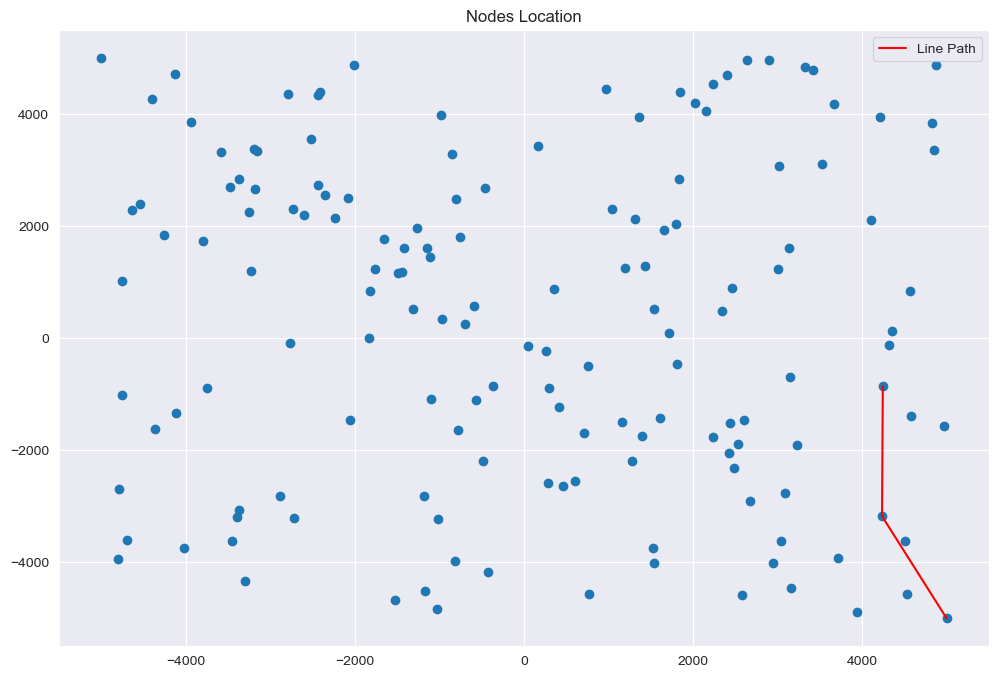

In [736]:
plot_points(position_data, [120, 72.0, 151.0])